# Loan Pay-Back Prediction using Machine Learning

# Importing Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import matplotlib.ticker as ticker
%matplotlib inline

In [25]:
df = pd.read_csv('loan.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [26]:
df.shape

(346, 10)

In [27]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data Visualization and pre-processing

In [28]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 have paid off to the loan while 86 have into the collection

In [29]:
import seaborn as sns

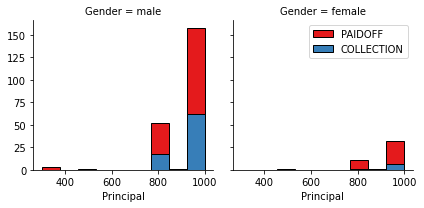

In [30]:
bins = np.linspace(df.Principal.min(),df.Principal.max(),10)
g = sns.FacetGrid(df,col="Gender",hue="loan_status",palette="Set1",col_wrap=2)
g.map(plt.hist,'Principal',bins=bins,ec="k")
g.axes[-1].legend()
plt.show()

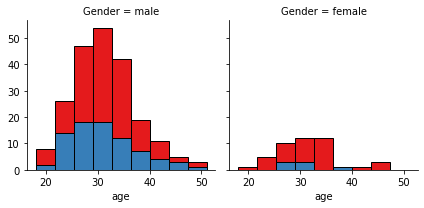

In [31]:
bins = np.linspace(df.age.min(),df.age.max(),10)
g = sns.FacetGrid(df,col="Gender",hue="loan_status",palette="Set1",col_wrap=2)
g.map(plt.hist,'age',bins=bins,ec="k")
plt.show()

# Pre-processing : Feature Selection/extraction
Lets look the day of week people gets loan

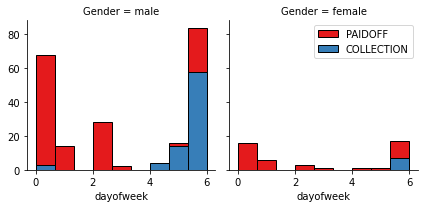

In [32]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(),df.dayofweek.max(),10)
g = sns.FacetGrid(df,col="Gender",hue="loan_status",palette="Set1",col_wrap=2)
g.map(plt.hist,'dayofweek',bins=bins,ec="k")
g.axes[-1].legend()
plt.show()

# Lets Look at the Months people gets loan

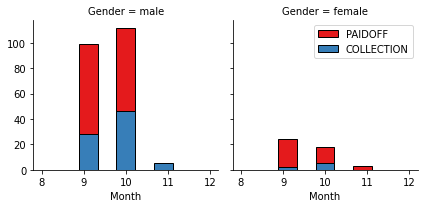

In [33]:
df['Month']= df.due_date.dt.month
bins = np.linspace(df.Month.min()-1,df.Month.max()+1,10)
g = sns.FacetGrid(df,col="Gender",hue="loan_status",palette="Set1",col_wrap=2)
g.map(plt.hist,'Month',bins=bins,ec="k")
g.axes[-1].legend()
plt.show()

# There is high possibility the people pay off the loan in the 9th 10th and or in the 11th Month

# As the Observation shows people who get the loan at the end of the week don't pay if off 
so let use Feature Binarization to set a threshold values less then day 4

In [34]:
df['weekend'] = df['dayofweek'].apply(lambda x:1 if(x>3) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,10,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,10,1


# Convert the Categorical Features into the Numerical 

In [35]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86% pay thier loan while 73% pay thier loan 
Lets convert the male to 0 and female to 1


In [36]:
df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1


In [37]:
df['deadline']=df['due_date']-df['effective_date']
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,deadline
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,29 days
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,29 days
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,14 days
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1,29 days
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1,29 days


In [38]:
df['deadline']=df['deadline'].dt.days
df.head(3)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,deadline
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,29
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,29
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,14


# One Hot Encoding 

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.One hot encoding is a technique used in machine learning to convert categorical variables into numerical data that can be used in machine learning models. In one hot encoding, each category is represented by a binary vector of 0s and 1s, where the index corresponding to the category is set to 1 and all other indices are set to 0.

In [39]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

There are only two people  with Master or Above Degree who paid thier  loan 

In [40]:
len(df[df.education=='Master or Above'])

2

In [41]:
Feature = df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])],axis=1)
Feature.drop(['Master or Above'],axis=1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


# Feature Selection


Feature selection is a process in machine learning of selecting a subset of relevant features (or variables) for use in building a model. The goal of feature selection is to improve the performance of the model by reducing the dimensionality of the data and removing irrelevant or redundant features that may negatively impact model performance or increase model complexity.

There are several approaches to feature selection in machine learning, including:

* Filter methods: This approach involves ranking the features based on statistical measures, such as correlation or mutual information, and selecting the top-ranking features. These methods are computationally efficient and can be used as a preprocessing step to reduce the feature space before applying more complex algorithms.

* Wrapper methods: This approach involves using a machine learning algorithm to evaluate the performance of a model trained on subsets of features. The algorithm iteratively selects and removes features until the optimal subset is found. This approach can be computationally expensive but can lead to better model performance.

* Embedded methods: This approach involves selecting features as part of the model building process. For example, some machine learning algorithms, such as Lasso regression and decision trees, have built-in mechanisms for feature selection.

The choice of feature selection method depends on the dataset and the problem at hand. It is important to evaluate the performance of the model after feature selection to ensure that the selected subset of features results in improved model performance and generalization to new data.

In [42]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


# Labels 

In [43]:
y = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'],value=[0,1]).values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

# Normalize Data 

Normalizing data is an important step in machine learning that is used to rescale and standardize the numerical features of a dataset. The goal of normalization is to ensure that all the features have the same scale and range, which can improve the performance of machine learning algorithms by preventing features with larger values from dominating those with smaller values.

There are several common techniques used for normalizing data in machine learning:

* Min-Max scaling: This technique scales the values of a feature to a range between 0 and 1. It is done by subtracting the minimum value of the feature and then dividing by the range of the feature (the difference between the maximum and minimum values).

* Z-score normalization: This technique standardizes the values of a feature to have a mean of 0 and a standard deviation of 1. It is done by subtracting the mean of the feature from each value and then dividing by the standard deviation of the feature.

* Robust scaling: This technique is similar to Min-Max scaling, but it is less sensitive to outliers. It scales the values of a feature to a range between the 25th and 75th percentiles of the feature.

The choice of normalization technique depends on the characteristics of the dataset and the machine learning algorithm being used. It is important to normalize the data before training a model to ensure that all features are on the same scale and to prevent bias towards certain features that may have larger values.

In [44]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
        -0.26122054,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679]])

In [46]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [47]:
X_train,y_train= X,y


In [48]:
X_train.shape , y_train.shape

((346, 9), (346,))

In [49]:
trainscores={}

# K-Nearest Neighbor(KNN) 

* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
* It is also called a `lazy learner` algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
* KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.
* <b>Example:</b> Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.

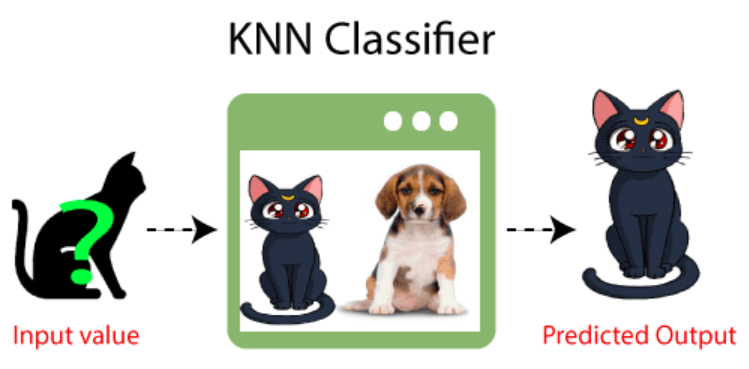

In [2]:
from IPython.display import Image
Image(filename = "Capture.png", width = 600, height = 200)

# Why do we need a K-NN Algorithm?
Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset. Consider the below diagram

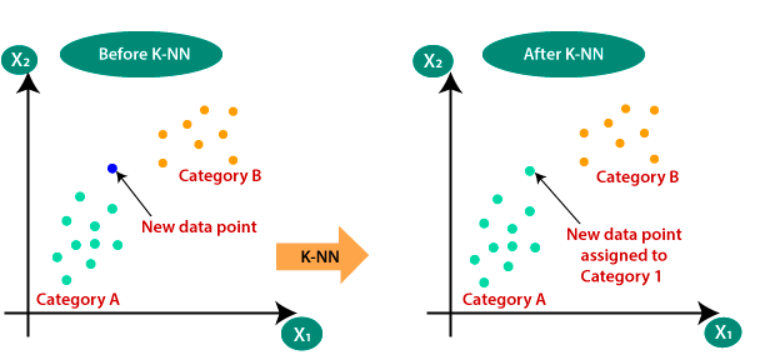

In [3]:
Image(filename = "knn1.png", width = 600, height = 200)

# How does K-NN work?
The K-NN working can be explained on the basis of the below algorithm:

* Step-1: Select the number K of the neighbors
* Step-2: Calculate the Euclidean distance of K number of neighbors
* Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
* Step-4: Among these k neighbors, count the number of the data points in each category.
* Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
* Step-6: Our model is ready.<br>
Suppose we have a new data point and we need to put it in the required category. Consider the below image:

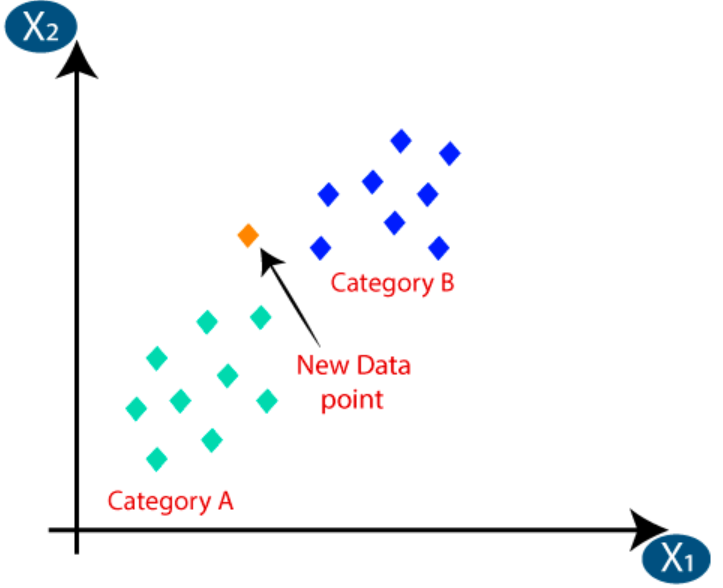

In [5]:
Image('knn2.png')

* Firstly, we will choose the number of neighbors, so we will choose the k=5.
* Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:

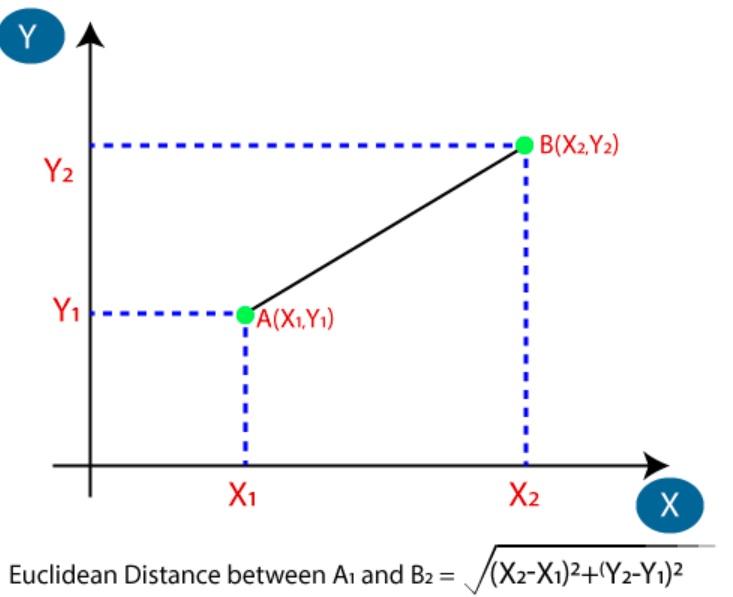

In [6]:
Image('knn3.png')

By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. Consider the below image:

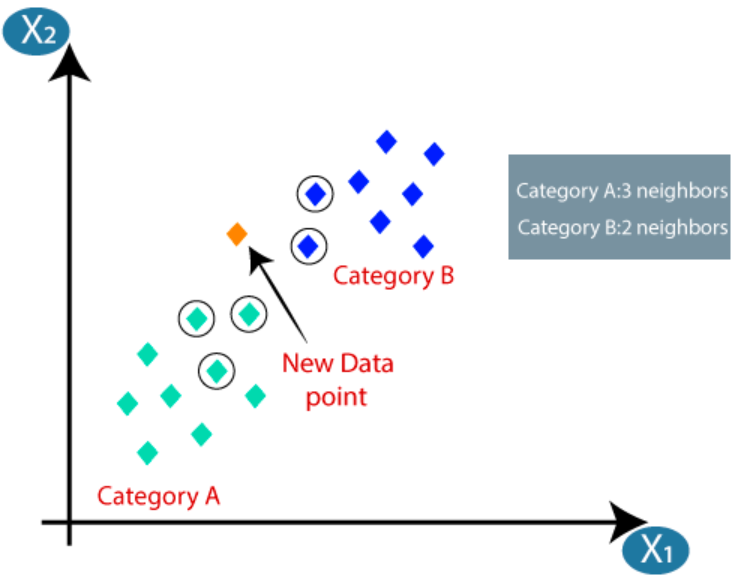

In [7]:
Image('knn4.png')

# How to select the value of K in the K-NN Algorithm?
#### Below are some points to remember while selecting the value of K in the K-NN algorithm:

There is no particular way to determine the best value for "K", so we need to try some values to find the best out of them. The most preferred value for K is 5.
A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.
Large values for K are good, but it may find some difficulties.

### Advantages of KNN Algorithm:
* It is simple to implement.
* It is robust to the noisy training data
* It can be more effective if the training data is large.

### Disadvantages of KNN Algorithm:
* Always needs to determine the value of K which may be complex some time.
* The computation cost is high because of calculating the distance between the data points for all the training samples.

In [50]:
from sklearn.neighbors import KNeighborsClassifier
bestScore = 0.0
accList=[]

for k in range(3,12):
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    scores = cross_val_score(clf_knn,X,y,cv=10)
    score = scores.mean()
    accList.append(score)
    
    if score> bestScore:
        bestScore =score
        best_clf = clf_knn
        bestK= k
        
        
print("Best K is : ",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn =best_clf


Best K is :  8 | Cross validation Accuracy : 0.7579831932773109


In [51]:
clf_knn.fit(X_train,y_train)
y_pred = best_clf.predict(X_train)

In [52]:
trainscores['KNN-jaccard']=jaccard_score(y_train,y_pred)
trainscores['KNN-f1-score']=f1_score(y_train,y_pred,average='weighted')


In [53]:
trainscores

{'KNN-jaccard': 0.25252525252525254, 'KNN-f1-score': 0.7537693061220201}

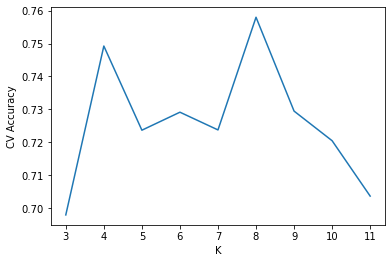

In [54]:
plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

# Decision Tree 

A tree has many analogies in real life, and turns out that it has influenced a wide area of machine learning, covering both classification and regression. In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions. Though a commonly used tool in data mining for deriving a strategy to reach a particular goal, its also widely used in machine learning.

* Decision Tree is a <b>`Supervised learning`</b> technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* In a Decision tree, there are two nodes, which are the <b>`Decision Node`</b> and <b>`Leaf Node`</b>. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* The decisions or the test are performed on the basis of features of the given dataset.
* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
* It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* In order to build a tree, we use the <b>`CART algorithm`</b>, which stands for <b>`Classification and Regression Tree`</b> algorithm.
* A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

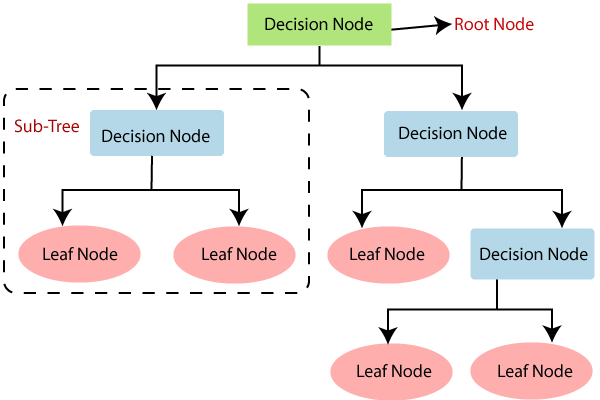

In [8]:
Image('decision.png')

# Why use Decision Trees?
There are various algorithms in Machine learning, so choosing the best algorithm for the given dataset and problem is the main point to remember while creating a machine learning model. Below are the two reasons for using the Decision tree:

Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
The logic behind the decision tree can be easily understood because it shows a tree-like structure.

## Decision Tree Terminologies
* <b>Root Node:</b> Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
* <b>Leaf Node:</b> Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
* <b>Splitting:</b> Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
* <b>Branch/Sub Tree:</b> A tree formed by splitting the tree.
* <b>Pruning:</b> Pruning is the process of removing the unwanted branches from the tree.
* <b>Parent/Child node:</b> The root node of the tree is called the parent node, and other nodes are called the child nodes.

## How does the Decision Tree algorithm Work?

In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree. The complete process can be better understood using the below algorithm:

* <b>Step-1:</b> Begin the tree with the root node, says S, which contains the complete dataset.
* <b>Step-2:</b> Find the best attribute in the dataset using Attribute Selection Measure (ASM).
* <b>Step-3:</b> Divide the S into subsets that contains possible values for the best attributes.
* <b>Step-4:</b> Generate the decision tree node, which contains the best attribute.
* <b>Step-5:</b> Recursively make new decision trees using the subsets of the dataset created in step -3. 

Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.
<br>
<b>Example:</b> Suppose there is a candidate who has a job offer and wants to decide whether he should accept the offer or Not. So, to solve this problem, the decision tree starts with the root node (Salary attribute by ASM). The root node splits further into the next decision node (distance from the office) and one leaf node based on the corresponding labels. The next decision node further gets split into one decision node (Cab facility) and one leaf node. Finally, the decision node splits into two leaf nodes (Accepted offers and Declined offer). Consider the below diagram:

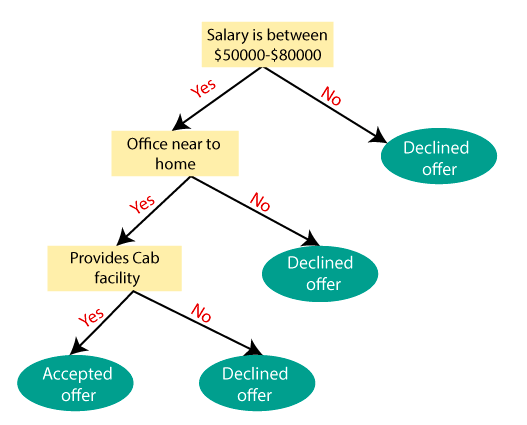

In [10]:
Image('decision1.png')

In [55]:
from sklearn import tree

In [56]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_train)

In [57]:
trainscores['Tree-jaccard'] = jaccard_score(y_train,y_pred)
trainscores['Tree-f1-score']=f1_score(y_train,y_pred,average='weighted')

In [58]:
trainscores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985}

# Support Vector Machine 

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.
<br><br>
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
<br><br>
SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. 

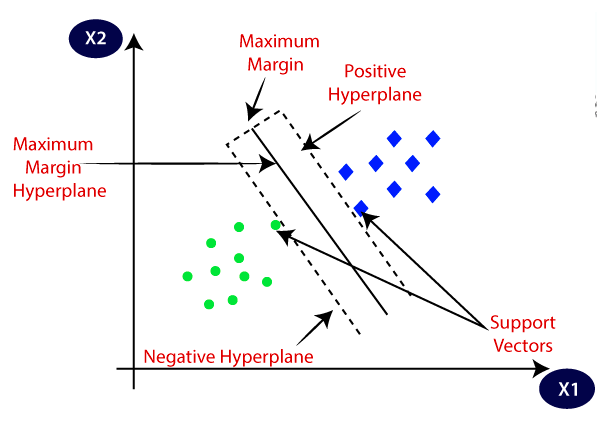

In [11]:
Image('svm.png')

<b>Example:</b> SVM can be understood with the example that we have used in the KNN classifier. Suppose we see a strange cat that also has some features of dogs, so if we want a model that can accurately identify whether it is a cat or dog, so such a model can be created by using the SVM algorithm. We will first train our model with lots of images of cats and dogs so that it can learn about different features of cats and dogs, and then we test it with this strange creature. So as support vector creates a decision boundary between these two data (cat and dog) and choose extreme cases (support vectors), it will see the extreme case of cat and dog. On the basis of the support vectors, it will classify it as a cat.

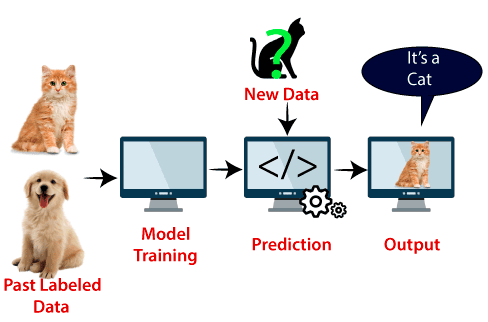

In [12]:
Image('svm1.png')

SVM algorithm can be used for Face detection, image classification, text categorization, etc.

Types of SVM
<b>SVM can be of two types:</b>

<b>Linear SVM:</b> Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.<br>
<b>Non-linear SVM:</b> Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

In [59]:
y_train = y_train.astype(float)

In [60]:
from sklearn import svm
clf_svm = svm.LinearSVC(random_state=7)
clf_svm.fit(X_train,y_train)
y_pred = clf_svm.predict(X_train)

In [61]:
trainscores['SVM-jaccard']=jaccard_score(y_train,y_pred)
trainscores['SVM-f1-score']=f1_score(y_train,y_pred,average='weighted')

In [62]:
trainscores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.054945054945054944,
 'SVM-f1-score': 0.6689062277741139}

# Logistic Regression 

* Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

* Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

* In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

* The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.

* Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.

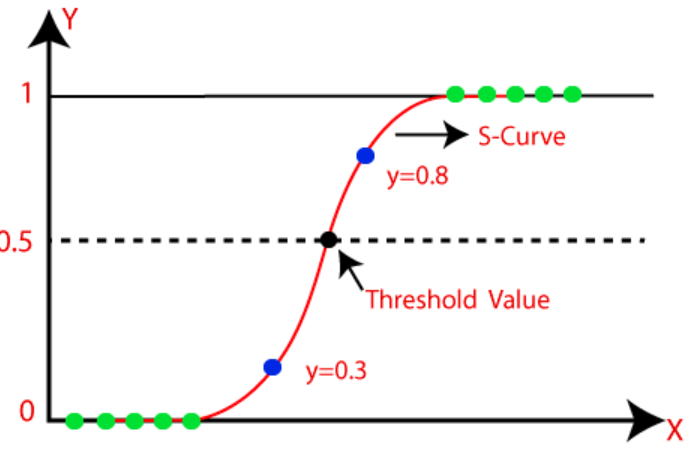

In [13]:
Image('lg.png')

<b>Note:</b> Logistic regression uses the concept of predictive modeling as regression; therefore, it is called logistic regression, but is used to classify samples; Therefore, it falls under the classification algorithm.

### Logistic Function (Sigmoid Function):
The sigmoid function is a mathematical function used to map the predicted values to probabilities.

* It maps any real value into another value within a range of 0 and 1.
* The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function.
* In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

### Assumptions for Logistic Regression:
* The dependent variable must be categorical in nature.
* The independent variable should not have multi-collinearity.

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf_log = LogisticRegression(random_state=0,solver='lbfgs',
                            multi_class = 'multinomial')
clf_log.fit(X_train,y_train)
y_pred = clf_log.predict(X_train)
y_proba = clf_log.predict_proba(X_train)

In [65]:
trainscores['LogReg-jaccard']= jaccard_score(y_train,y_pred)
trainscores['LogReg-f1-score']=f1_score(y_train,y_pred,average='weighted')

In [66]:
trainscores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.054945054945054944,
 'SVM-f1-score': 0.6689062277741139,
 'LogReg-jaccard': 0.14583333333333334,
 'LogReg-f1-score': 0.7088399037150602}

## F1-Score 
F1 score is a useful metric when the classes in the data are imbalanced, meaning that one class is much more common than the other. In such cases, accuracy alone can be misleading since a model that always predicts the majority class will have a high accuracy but may not be useful in practice. The F1 score, on the other hand, provides a more balanced measure of performance that takes into account both false positives and false negatives.

## Jaccard Score
A Jaccard score of 1 indicates that the predicted set and the actual set are identical, while a score of 0 indicates that there is no overlap between the sets. In practice, Jaccard scores between 0 and 1 are more common, with higher scores indicating better agreement between the predicted and actual sets.

# Load Test Set for evaluation

In [83]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [84]:
test_df['due_date']= pd.to_datetime(test_df['due_date'])
test_df['effective_date']= pd.to_datetime(test_df['effective_date'])
test_df['dayofweek']=test_df['effective_date'].dt.dayofweek
test_df['weekend']= test_df['dayofweek'].apply(lambda x:1 if(x>3)else 0)
test_df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
Feature = test_df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])],axis=1)
Feature.drop(['Master or Above'],axis=1,inplace=True)
X = Feature
y=test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'],value=[0,1]).values
testy= y.astype(float)
testX = preprocessing.StandardScaler().fit_transform(X)


In [99]:
Feature

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,50,1,0,3,1,0,0
1,300,7,35,0,1,4,0,0,0
2,1000,30,43,1,1,5,0,1,0
3,1000,30,26,0,1,5,0,0,1
4,800,15,29,0,1,6,1,0,0
5,700,15,33,0,1,6,0,1,0
6,1000,15,24,0,1,6,0,0,1
7,1000,30,32,0,1,6,1,0,0
8,800,15,27,1,1,6,0,0,1
9,1000,15,37,0,1,6,0,0,1


In [86]:
testscores={}


In [88]:
trainscores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.054945054945054944,
 'SVM-f1-score': 0.6689062277741139,
 'LogReg-jaccard': 0.14583333333333334,
 'LogReg-f1-score': 0.7088399037150602}

In [89]:
testscores

{}

In [80]:
list(Feature.columns)

['Principal',
 'terms',
 'age',
 'Gender',
 'weekend',
 'dayofweek',
 'Bechalor',
 'High School or Below',
 'college']

In [90]:
test_df['due_date']= pd.to_datetime(test_df['due_date'])
test_df['effective_date']= pd.to_datetime(test_df['effective_date'])
test_df['dayofweek']=test_df['effective_date'].dt.dayofweek
test_df['weekend']= test_df['dayofweek'].apply(lambda x:1 if(x>3)else 0)
test_df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
Feature = test_df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])],axis=1)
Feature.drop(['Master or Above'],axis=1,inplace=True)
X = Feature
y=test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'],value=[0,1]).values
testy= y.astype(float)
testX = preprocessing.StandardScaler().fit_transform(X)

In [91]:
testscores={}

In [92]:
knn_pred = clf_knn.predict(testX)
testscores['KNN-jaccard']=jaccard_score(testy,knn_pred)
testscores['KNN-f1-score']=f1_score(testy,knn_pred,average='weighted')

In [93]:
tree_pred = clf_tree.predict(testX)
testscores['Tree-Jaccard']=jaccard_score(testy,tree_pred)
testscores['Tree-f1-score']=f1_score(testy,tree_pred,average='weighted')

In [94]:
svm_pred = clf_svm.predict(testX)
testscores['SVM-jaccard']=jaccard_score(testy,svm_pred)
testscores['SVM-f1-score']=f1_score(testy,svm_pred,average='weighted')

In [95]:
log_pred = clf_log.predict(testX)
testscores['LogReg-jaccard']=jaccard_score(testy,log_pred)
testscores['LogReg-f1-score']=f1_score(testy,log_pred,average='weighted')

In [96]:
trainscores

{'KNN-jaccard': 0.25252525252525254,
 'KNN-f1-score': 0.7537693061220201,
 'Tree-jaccard': 0.7222222222222222,
 'Tree-f1-score': 0.924927020820985,
 'SVM-jaccard': 0.054945054945054944,
 'SVM-f1-score': 0.6689062277741139,
 'LogReg-jaccard': 0.14583333333333334,
 'LogReg-f1-score': 0.7088399037150602}

In [97]:
testscores

{'KNN-jaccard': 0.2222222222222222,
 'KNN-f1-score': 0.7144311330357843,
 'Tree-Jaccard': 0.38095238095238093,
 'Tree-f1-score': 0.7618862861115153,
 'SVM-jaccard': 0.13333333333333333,
 'SVM-f1-score': 0.6959228135698723,
 'LogReg-jaccard': 0.14285714285714285,
 'LogReg-f1-score': 0.708937198067633}

In [101]:
clf_knn.predict([[1000,30,50,1,0,3,1,0,0]])

array([0], dtype=int64)

In [102]:
clf_tree.predict([[1000,30,50,1,0,3,1,0,0]])

array([0], dtype=int64)

In [103]:
clf_svm.predict([[1000,30,50,1,0,3,1,0,0]])

array([1.])

In [104]:
clf_log.predict([[1000,30,50,1,0,3,1,0,0]])

array([1.])

In [105]:
clf_tree.predict([[300,7,35,0,1,4,0,0,0]])

array([1], dtype=int64)